## K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

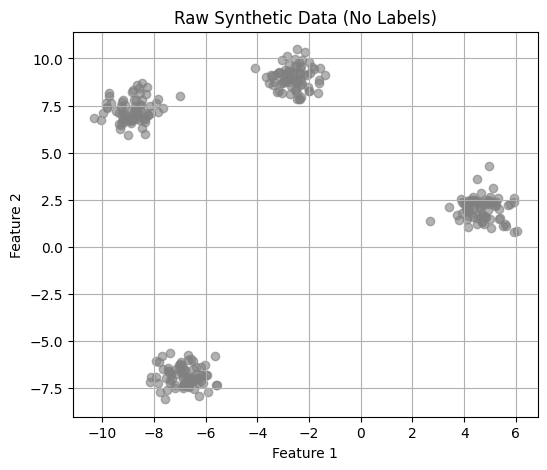

In [2]:
# creating synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6)
plt.title("Raw Synthetic Data (No Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### K-Means Functions

In [4]:
# Step 1: Initialize k centroids
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]


# Step 2: Assignment Step
def assign_clusters(X, centroids):
    labels = []
    for x in X:  # loop over each data point
        # compute distance to every centroid
        distances = [np.linalg.norm(x - c) for c in centroids]
        # pick the nearest centroid
        labels.append(np.argmin(distances))
    return np.array(labels)

# Step 3: Update Step
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])


# compute distance between old and new centroids
# if total movement of centroids is less than tol, the function returns True → stop the algorithm (converged).
# Otherwise, it returns False → continue updating.
def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.linalg.norm(new_centroids - old_centroids) < tol

In [5]:
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

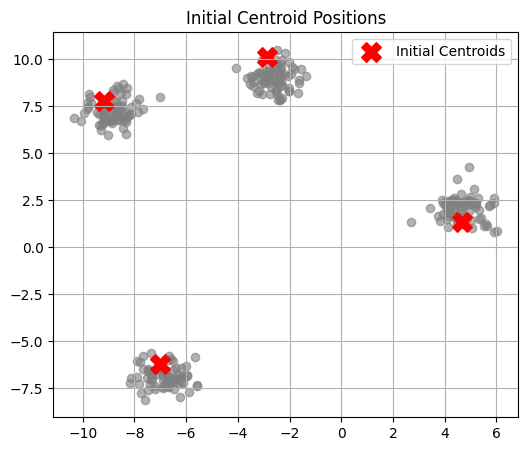

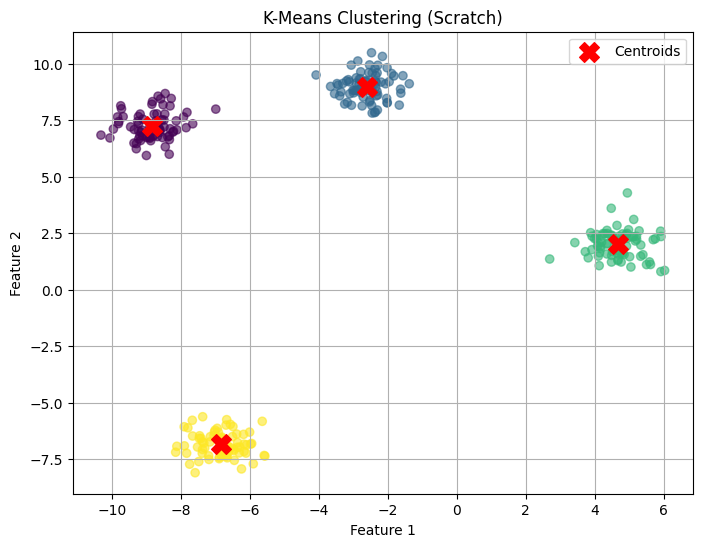

In [9]:
k = 4
labels, centroids = kmeans(X, k)

# Plotting Initial Centroids
initial_centroids = initialize_centroids(X, 4)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='X', s=200, label='Initial Centroids')
plt.title("Initial Centroid Positions")
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (Scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

*Search for: Solving centroids inintialization problems
[K-Means++](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjjmp7tmpKNAxUHSaQEHT7jJBQQFnoECB4QAQ&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fml-k-means-algorithm%2F&usg=AOvVaw2lbO9iL34vpMRC2URQXu6Q&opi=89978449)